The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

# ==============================================================================
# NOBEL PRIZE ANALYSIS: Global Patterns in Scientific Recognition (1901-2023)
# ==============================================================================
# This comprehensive analysis explores demographic, geographic, and temporal 
# patterns in Nobel Prize distribution over 122 years of scientific achievement.
# ==============================================================================




In [51]:
# Cell 1: Data Import and Setup
# Load required libraries for data manipulation, visualization, and analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import Nobel Prize dataset from CSV
df = pd.read_csv("data/nobel.csv")
nobel = df

In [52]:
# Cell 2: Initial Data Exploration
# Display the first few rows and structure of the dataset
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


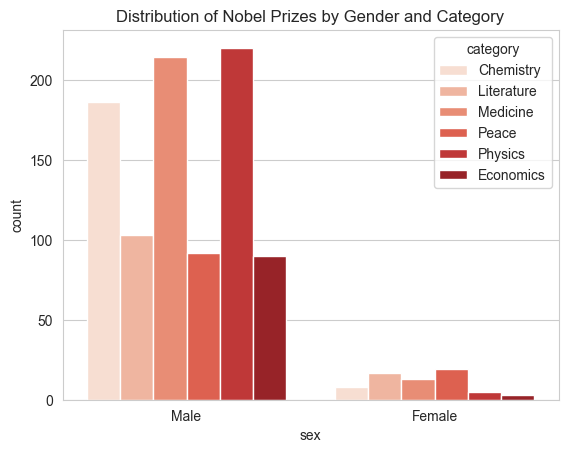

In [53]:
# Cell 3: Question 1 - Gender and Birth Country Analysis
# Research Question: What are the demographic patterns of Nobel Prize recipients?
# Hypothesis: Certain genders and countries dominate Nobel Prize awards

# Calculate the most frequently awarded gender
top_gender = nobel['sex'].mode()[0]

# Identify the most common birth country among laureates
top_country = nobel['birth_country'].mode()[0]

# Visualize the distribution of Nobel Prizes across gender and categories
sns.set_style("whitegrid")
sns.set_palette('Reds')
sns.countplot(data=nobel, x='sex', hue='category')
plt.title('Distribution of Nobel Prizes by Gender and Category')
plt.show()

In [54]:
# Cell 4: Country Analysis - Data Preparation
# Aggregate and organize Nobel Prize data by birth country
# This allows us to identify geographical patterns in prize distribution

top_countries = nobel.groupby("birth_country")
top_countries

C:\Users\BOOST PC\AppData\Local\Temp\ipykernel_14280\2594869133.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_count.values, y=top_countries_count.index, palette='husl', orient='h')


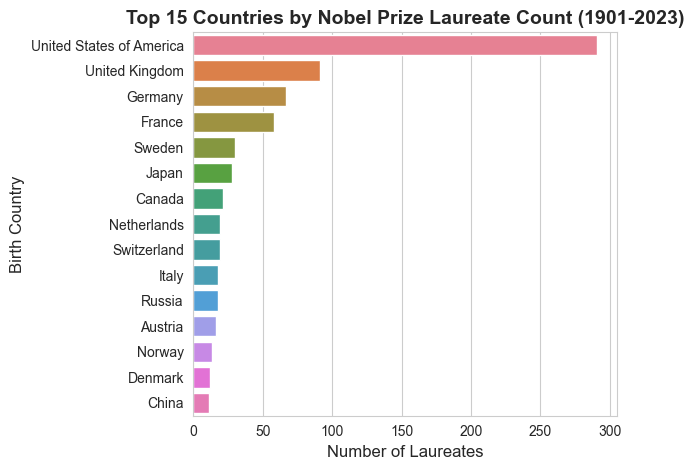

In [55]:
# Cell 5: Top 15 Countries Visualization
# Research Finding: Identify which countries produce the most Nobel laureates
# This analysis reveals the global concentration of Nobel Prize achievements

# Extract top 15 countries by laureate count
top_countries_count = nobel['birth_country'].value_counts().head(15)

# Create horizontal bar chart for better country name readability
sns.barplot(x=top_countries_count.values, y=top_countries_count.index, palette='husl', orient='h')
plt.title('Top 15 Countries by Nobel Prize Laureate Count (1901-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Laureates', fontsize=12)
plt.ylabel('Birth Country', fontsize=12)
plt.tight_layout()
plt.show()

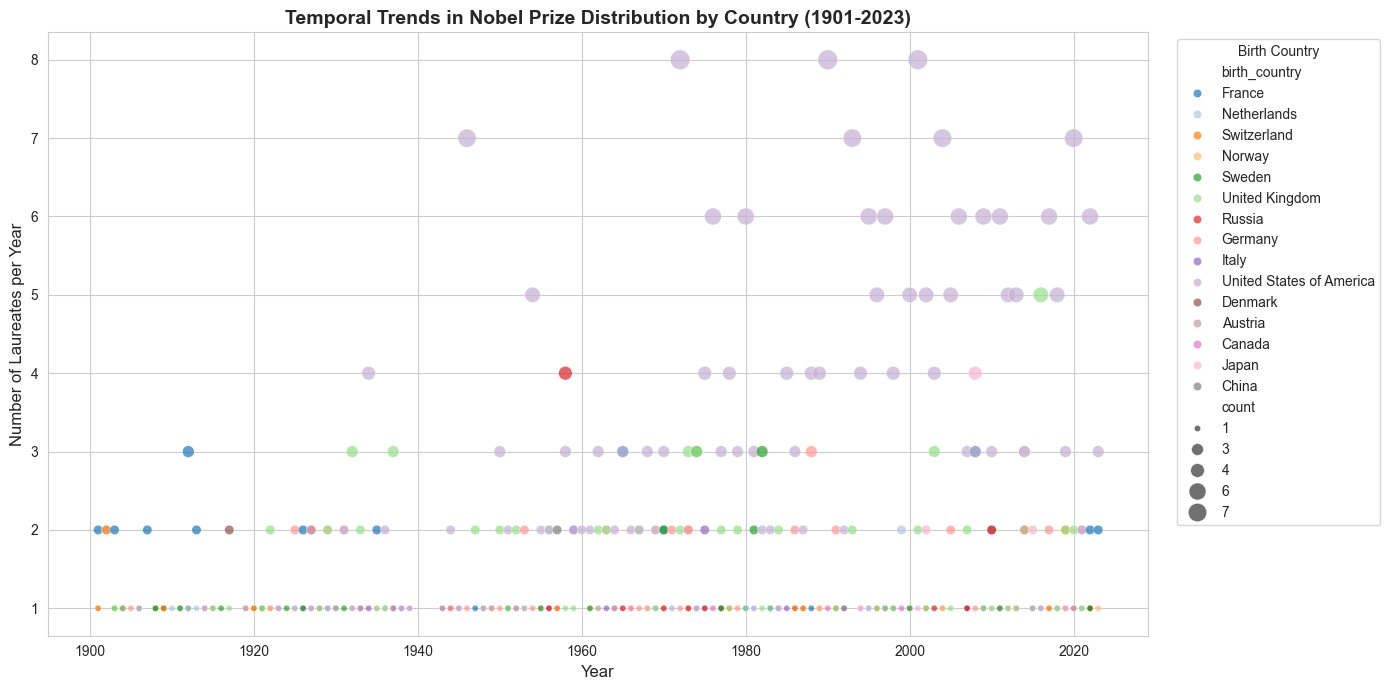

Temporal analysis visualization complete.


In [56]:
# Cell 6: Temporal Analysis of Nobel Prize Distribution
# Research Question: How has the geographic distribution of Nobel Prizes evolved over time?
# Time-series analysis reveals trends in global scientific achievement

# Aggregate laureate counts by year and birth country
year_country_counts = nobel.groupby(['year', 'birth_country']).size().reset_index(name='count')

# Filter to focus on top 15 countries for clarity
top_countries = top_countries_count.index.tolist()
plot_df = year_country_counts[year_country_counts['birth_country'].isin(top_countries)]

# Create scatter plot with bubble sizes proportional to laureate count
plt.figure(figsize=(14,7))
sns.scatterplot(
    data=plot_df,
    x='year',
    y='count',
    hue='birth_country',
    palette='tab20',
    size='count',
    sizes=(20, 200),
    alpha=0.7,
    edgecolor='w'
)
plt.title('Temporal Trends in Nobel Prize Distribution by Country (1901-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Laureates per Year', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Birth Country')
plt.tight_layout()
plt.show()
print("Temporal analysis visualization complete.")

        total_laureates  usa_laureates  usa_ratio
decade                                           
1900                 57              1   0.017544
1910                 40              3   0.075000
1920                 54              4   0.074074
1930                 56             14   0.250000
1940                 43             13   0.302326
1950                 72             21   0.291667
1960                 79             21   0.265823
1970                104             33   0.317308
1980                 97             31   0.319588
1990                104             42   0.403846
2000                123             52   0.422764
2010                121             38   0.314050
2020                 50             18   0.360000

Key Finding: Decade with highest US Nobel Prize ratio: 2000s
US percentage of total laureates in 2000s: 42.28%


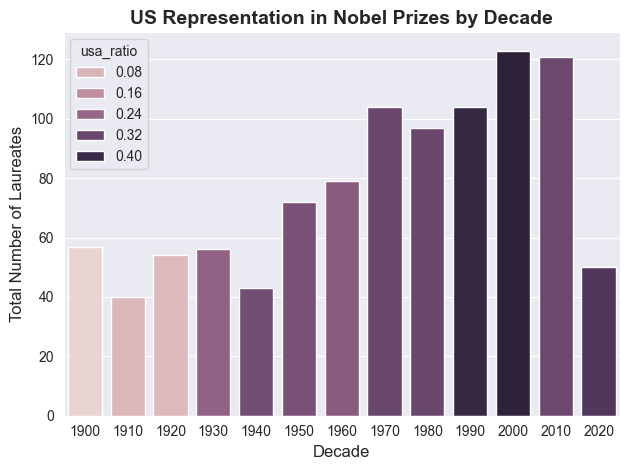

In [57]:
# Cell 7: Question 2 - US Dominance Analysis
# Research Question: Which decade shows the highest concentration of US Nobel Prize winners?
# Analysis: Calculate the ratio of US laureates to total laureates per decade
# Hypothesis: US dominance may have peaked in mid-to-late 20th century

# Create decade variable from year for decadal analysis
nobel['decade'] = (nobel['year'] // 10) * 10

# Filter dataset for US-born laureates
usa_nobel = nobel[nobel['birth_country']=='United States of America']

# Calculate total laureates per decade
total_per_decade = nobel['decade'].value_counts().sort_index()

# Calculate US laureates per decade
usa_per_decade = usa_nobel['decade'].value_counts().sort_index()

# Construct summary DataFrame for comparative analysis
decade_df = pd.DataFrame({
    'total_laureates': total_per_decade,
    'usa_laureates': usa_per_decade.fillna(0).astype(int),
})

# Calculate the proportion of US laureates in each decade
decade_df['usa_ratio'] = decade_df['usa_laureates'] / decade_df['total_laureates']

# Identify the decade with highest US representation
max_decade_usa = int(decade_df['usa_ratio'].idxmax())

# Report findings
print(decade_df)
print(f"\nKey Finding: Decade with highest US Nobel Prize ratio: {max_decade_usa}s")
print(f"US percentage of total laureates in {max_decade_usa}s: {decade_df.loc[max_decade_usa, 'usa_ratio']:.2%}")

# Visualize US dominance across decades
sns.set_style('darkgrid')
sns.barplot(data=decade_df, x='decade',y='total_laureates',hue='usa_ratio')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Total Number of Laureates', fontsize=12)
plt.title('US Representation in Nobel Prizes by Decade', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

    decade    category  female_count  total_count  female_proportion
0     1900  Literature             1           10           0.100000
1     1900       Peace             1           14           0.071429
2     1900     Physics             1           13           0.076923
3     1910   Chemistry             1            8           0.125000
4     1920  Literature             2           10           0.200000
5     1930   Chemistry             1           13           0.076923
6     1930  Literature             1            9           0.111111
7     1930       Peace             1            9           0.111111
8     1940  Literature             1            6           0.166667
9     1940    Medicine             1           14           0.071429
10    1940       Peace             1            7           0.142857
11    1960   Chemistry             1           15           0.066667
12    1960  Literature             1           11           0.090909
13    1960     Physics            

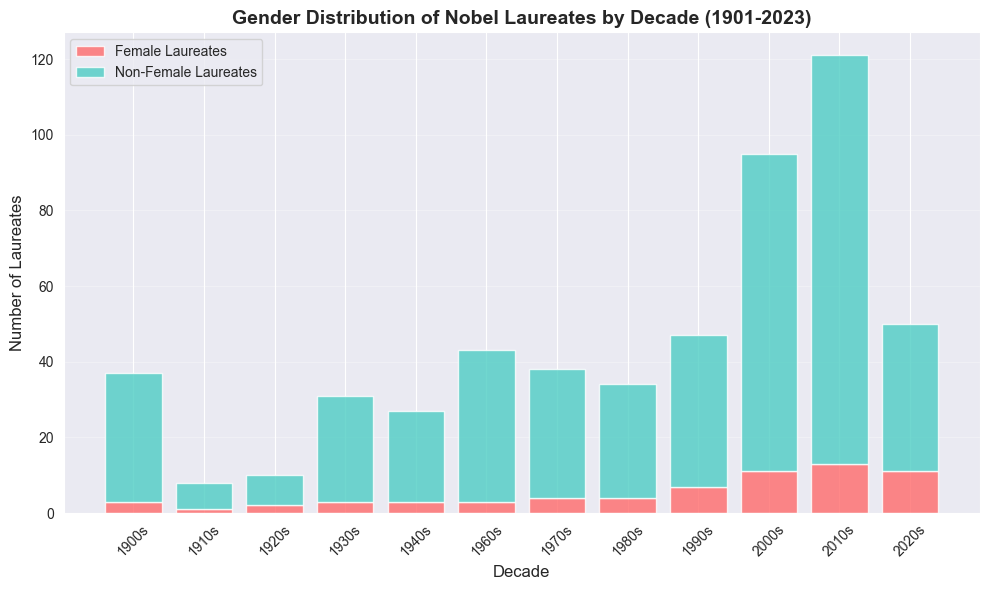

In [58]:
# Cell 8: Question 3 - Gender Equity Analysis
# Research Question: Which category and decade show the highest female representation?
# Analysis: Calculate proportion of female laureates across categories and time periods
# Significance: Reveals progress (or lack thereof) in gender diversity in scientific recognition

# Filter dataset for female laureates only
females = nobel[nobel['sex'] == 'Female']

# Group female laureates by decade and category
females_by_decade = females.groupby(['decade','category']).size().reset_index(name='female_count')

# Calculate total laureates by decade and category (baseline)
total_by_decade_category = nobel.groupby(['decade','category']).size().reset_index(name='total_count')

# Merge to create comparative dataset
decade_category_df = females_by_decade.merge(total_by_decade_category, on=['decade','category'])

# Calculate female proportion for each decade-category combination
decade_category_df['female_proportion'] = decade_category_df['female_count'] / decade_category_df['total_count']

# Identify the combination with highest female representation
max_row = decade_category_df.loc[decade_category_df['female_proportion'].idxmax()]

# Store result in required format
max_female_dict = {int(max_row['decade']): max_row['category']}

# Display analysis results
print(decade_category_df)
print(f"\nKey Finding: Highest female proportion: {max_row['female_proportion']:.2%} in {max_row['category']}, {max_row['decade']}s")
print(f"max_female_dict: {max_female_dict}")

# Aggregate female counts by decade for visualization
decade_summary = decade_category_df.groupby('decade')[['female_count', 'total_count']].sum().reset_index()
decade_summary['non_female_count'] = decade_summary['total_count'] - decade_summary['female_count']

# Create stacked bar chart showing gender distribution over time
plt.figure(figsize=(10, 6))
x = np.arange(len(decade_summary))

plt.bar(x, decade_summary['female_count'], label='Female Laureates', color='#FF6B6B', alpha=0.8)
plt.bar(x, decade_summary['non_female_count'], bottom=decade_summary['female_count'], 
        label='Non-Female Laureates', color='#4ECDC4', alpha=0.8)

plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Laureates', fontsize=12)
plt.title('Gender Distribution of Nobel Laureates by Decade (1901-2023)', fontsize=14, fontweight='bold')
plt.xticks(x, [f"{int(d)}s" for d in decade_summary['decade']], rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\BOOST PC\AppData\Local\Temp\ipykernel_14280\624299153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_summary, x='decade', y='female_count', palette='RdPu', width=0.6)


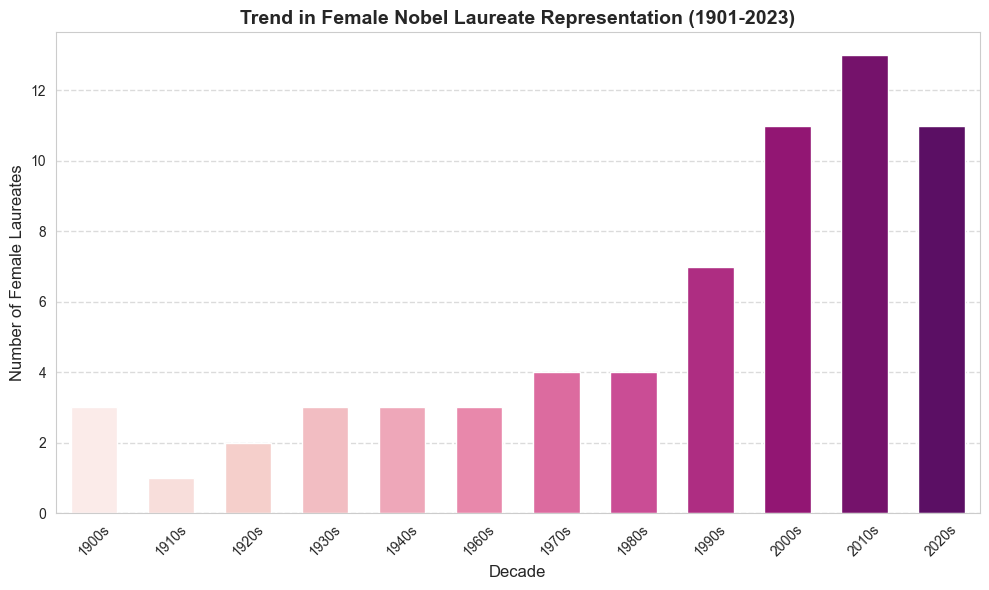

In [59]:
# Cell 9: Gender Equity Trend Analysis
# Focused visualization on female laureate trends across decades
# This trend analysis reveals whether gender representation is improving

plt.figure(figsize=(10, 6))

sns.set_style('whitegrid')
sns.barplot(data=decade_summary, x='decade', y='female_count', palette='RdPu', width=0.6)

plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Female Laureates', fontsize=12)
plt.title('Trend in Female Nobel Laureate Representation (1901-2023)', fontsize=14, fontweight='bold')
plt.xticks([i for i in range(len(decade_summary))], [f"{int(d)}s" for d in decade_summary['decade']], rotation=45)
plt.grid(axis='y', alpha=0.7, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [60]:
# Cell 10: Question 4 - First Female Laureate Analysis
# Research Question: Who was the pioneering woman to break through in Nobel Prize recognition?
# Historical Significance: Identifying the first female winner contextualizes gender progress

# Filter for female laureates and sort chronologically
female_laureates_chronological = nobel[nobel['sex']=='Female'].sort_values('year',ascending=True)

# Extract details of the first female Nobel laureate
first_woman_name = female_laureates_chronological['full_name'].iloc[0]
first_woman_category = female_laureates_chronological['category'].iloc[0]
first_woman_year = int(female_laureates_chronological['year'].iloc[0])

# Report historical finding
print(f'Historical Finding: First female Nobel Laureate: {first_woman_name}')
print(f'Field of Achievement: {first_woman_category}')
print(f'Year of Award: {first_woman_year}')
print(f'\nOther early female laureates:')
print(female_laureates_chronological.head())

Historical Finding: First female Nobel Laureate: Marie Curie, née Sklodowska
Field of Achievement: Physics
Year of Award: 1903

Other early female laureates:
     year    category                               prize  \
19   1903     Physics     The Nobel Prize in Physics 1903   
29   1905       Peace          The Nobel Peace Prize 1905   
51   1909  Literature  The Nobel Prize in Literature 1909   
62   1911   Chemistry   The Nobel Prize in Chemistry 1911   
128  1926  Literature  The Nobel Prize in Literature 1926   

                                            motivation prize_share  \
19   "in recognition of the extraordinary services ...         1/4   
29                                                 NaN         1/1   
51   "in appreciation of the lofty idealism, vivid ...         1/1   
62   "in recognition of her services to the advance...         1/1   
128  "for her idealistically inspired writings whic...         1/1   

     laureate_id laureate_type  \
19             6    

In [61]:
# Cell 11: Question 5 - Repeat Winners Analysis
# Research Question: Who are the individuals with multiple Nobel Prize awards?
# Significance: Repeat winners are rare; their identification reveals exceptional scientific achievement

# Calculate the frequency of each laureate's name in the dataset
repeat_winners = nobel['full_name'].value_counts()

# Filter to identify individuals with 2 or more Nobel Prizes
repeat_list = repeat_winners[repeat_winners >= 2].index.tolist()

# Report quantitative findings
print(f"Research Finding: {len(repeat_list)} individuals have won the Nobel Prize multiple times")
print(f"\nDetailed breakdown of repeat winners:")
for winner in repeat_list:
    print(f"  • {winner}: {repeat_winners[winner]} Nobel Prizes")

# Store final result
print(f"\nComplete list of repeat winners: {repeat_list}")

Research Finding: 6 individuals have won the Nobel Prize multiple times

Detailed breakdown of repeat winners:
  • Comité international de la Croix Rouge (International Committee of the Red Cross): 3 Nobel Prizes
  • Frederick Sanger: 2 Nobel Prizes
  • Marie Curie, née Sklodowska: 2 Nobel Prizes
  • Office of the United Nations High Commissioner for Refugees (UNHCR): 2 Nobel Prizes
  • John Bardeen: 2 Nobel Prizes
  • Linus Carl Pauling: 2 Nobel Prizes

Complete list of repeat winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
